In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [11]:
nltk.download(['stopwords', 'wordnet', 'punkt'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hiwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hiwi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hiwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
df = pd.read_csv(r"C://Users//Hiwi//Downloads//Data//raw_analyst_ratings.csv", parse_dates=['date'])
print(f"Dataset shape: {df.shape}")

Dataset shape: (1407328, 6)


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') 
def preprocess_text(text):
    # Lowercase
    text = text.lower()    
    # Remove special characters/numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)    
    # Tokenize
    tokens = nltk.word_tokenize(text)    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'said', 'mln', 'klk', 'reuters', 'also', 'will', 'new', 'us', 'year'}
    stop_words.update(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)
# Apply preprocessing
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hiwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hiwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hiwi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hiwi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
stock_df = pd.read_csv(r"C://Users//Hiwi//Downloads//Data//yfinance_data//AAPL_historical_data.csv", parse_dates=['Date'])

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce').dt.date

In [ ]:
from textblob import TextBlob
def calculate_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity
df['Sentiment'] = df['headline'].apply(calculate_sentiment)
most_positive = df.sort_values(by='Sentiment', ascending=False).head(5)

# Most negative headlines
most_negative = df.sort_values(by='Sentiment').head(5)

In [ ]:
# Most positive headlines
most_positive = df.sort_values(by='Sentiment', ascending=False).head(5)
# Most negative headlines
most_negative = df.sort_values(by='Sentiment').head(5)

In [ ]:
print("Most Positive Headlines:")
print(most_positive[['headline', 'Sentiment']])
print("\nMost Negative Headlines:")
print(most_negative[['headline', 'Sentiment']])

In [ ]:
def categorize_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)
print(df[['headline', 'Sentiment', 'SentimentCategory']].head(10))

In [ ]:
daily_sentiment = df.groupby('date')['Sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date': 'Date'}, inplace=True)

In [ ]:
stock_df['Return'] = stock_df['Close'].pct_change()

In [ ]:
merged_df = pd.merge(stock_df, daily_sentiment, on='Date', how='inner')

In [ ]:
correlation = merged_df[['Return', 'Sentiment']].corr()
print(correlation)

In [34]:
print(merged_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Return', 'Sentiment'],
      dtype='object')


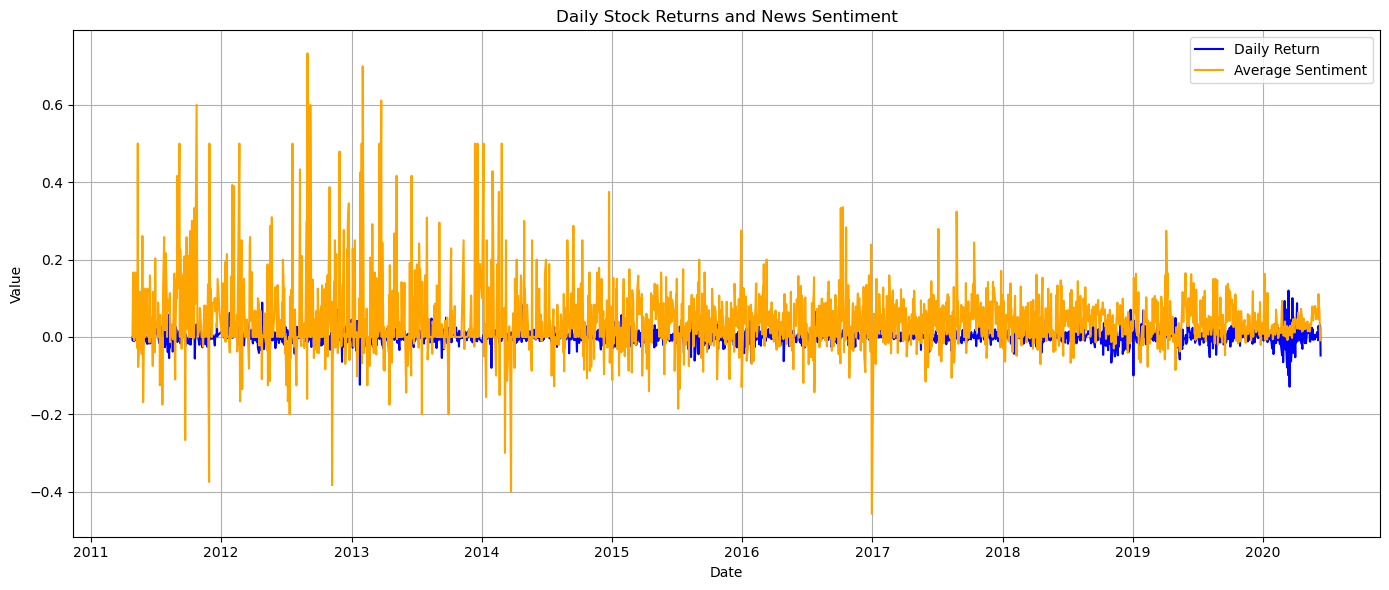

In [35]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_df, x='Date', y='Return', label='Daily Return', color='blue')
sns.lineplot(data=merged_df, x='Date', y='Sentiment', label='Average Sentiment', color='orange')
plt.title('Daily Stock Returns and News Sentiment')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

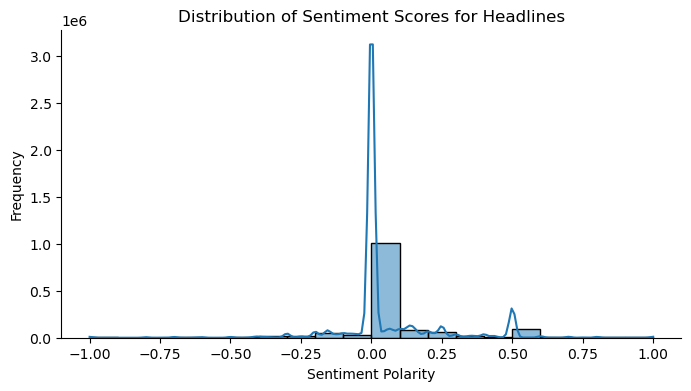

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores for Headlines')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Headline Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [26]:
most_positive_headlines = df.nlargest(5, 'Sentiment')
print("\nMost Positive Headlines:")
print(most_positive_headlines[['headline', 'Sentiment']])
most_negative_headlines = df.nsmallest(5, 'Sentiment')
print("\nMost Negative Headlines:")
print(most_negative_headlines[['headline', 'Sentiment']])


Most Positive Headlines:
                                               headline  Sentiment
819            Best Buy: Analysts' Upgrades, Downgrades        1.0
1343    OneMove(TM) Records its Best Month Ever in July        1.0
1382  Klondike Silver Completes Underground Drilling...        1.0
1849                             10 Best Stocks Of 2017        1.0
2270          Miners: The Best Way To Play A Rate Hike?        1.0

Most Negative Headlines:
                                               headline  Sentiment
2552  Tech, Semiconductors Among Worst Performers As...       -1.0
3175               I've just made a horrible investment       -1.0
5658   Worst Performing Industries For October 13, 2016       -1.0
5710   Worst Performing Industries For December 2, 2014       -1.0
6100                            10 Worst Stocks Of 2017       -1.0
